<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Lab/001_Implementing_Gesture_Classifier_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [104]:

jump = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/jump_set.csv")
run = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/run_set.csv")
squat = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/squat_set.csv")
walk = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/walk_set.csv")
other = pd.read_csv("https://raw.githubusercontent.com/UNCG-DAISY/Tiny_Gesture/main/data/other_set.csv")

In [105]:
jump.shape

(11900, 6)

In [106]:
run.shape

(11900, 6)

## Data Preprocessing

In [107]:
GESTURES = [
    "squat_set",
    "jump_set",
    "walk_set",
    "run_set",
    "other_set"]

In [108]:
SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
dft = [ jump,run,squat,walk,other]
inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  print(output)
  df = dft[gesture_index]
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)
# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")



Processing index 0 for gesture 'squat_set'.
[1. 0. 0. 0. 0.]
	There are 100 recordings of the squat_set gesture.
Processing index 1 for gesture 'jump_set'.
[0. 1. 0. 0. 0.]
	There are 100 recordings of the jump_set gesture.
Processing index 2 for gesture 'walk_set'.
[0. 0. 1. 0. 0.]
	There are 100 recordings of the walk_set gesture.
Processing index 3 for gesture 'run_set'.
[0. 0. 0. 1. 0.]
	There are 100 recordings of the run_set gesture.
Processing index 4 for gesture 'other_set'.
[0. 0. 0. 0. 1.]
	There are 100 recordings of the other_set gesture.
Data set parsing and preparation complete.


In [109]:
input_shape=inputs[0].shape

In [110]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [111]:
model = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(512,input_shape=input_shape, activation="relu"),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dropout(.1),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(5,activation = "sigmoid")
      ])



In [112]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               366080    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [114]:
model.fit(X_train, y_train,
          epochs = 10,
          validation_split = 0.2,
          batch_size=10,
          verbose=True)

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 1.7221 - accuracy: 0.1802 - val_loss: 1.6189 - val_accuracy: 0.1875
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6182 - accuracy: 0.2013 - val_loss: 1.6509 - val_accuracy: 0.1625
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6386 - accuracy: 0.1741 - val_loss: 1.6666 - val_accuracy: 0.1875
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6112 - accuracy: 0.2293 - val_loss: 1.6140 - val_accuracy: 0.1625
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6100 - accuracy: 0.2186 - val_loss: 1.6351 - val_accuracy: 0.2250
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 1.5816 - accuracy: 0.2653 - val_loss: 1.5865 - val_accuracy: 0.1875
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 1.5892 - accuracy: 0.2253 - val_loss: 1.5330 - val_accuracy: 0.4000
Epoch 8/10
32/32 [=

In [115]:
predictions = model.predict(X_test)

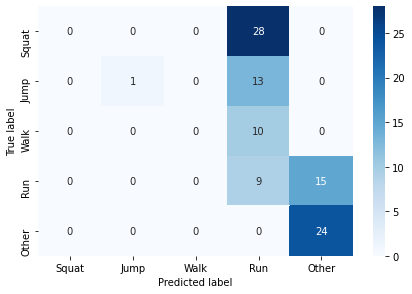

In [116]:
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test, 1), predictions=tf.argmax(predictions, 1))
axis_labels = ["Squat", "Jump", "Walk", "Run", "Other"]
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm)-0, 0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()